## Gold price with respect to Neveda temperature

In [1]:
import pandas as pd
import datetime
from datetime import timedelta

df_gold = pd.read_csv(r"Gold Futures Historical Data.csv", decimal = ',')
df_gold.sort_values(by = ['Date'], inplace = True)
df_gold.reset_index(drop = True, inplace = True)
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold = df_gold[['Date', 'Price', 'Change %']]
df_gold = df_gold.replace(',','', regex=True)
df_gold = df_gold.replace('%','', regex=True)
df_gold['Price']=df_gold['Price'].astype(float)
df_gold['Change %']=df_gold['Change %'].astype(float)
df_gold


,Date,Price,Change %
0,2014-01-02,1225.20,1.90
1,2014-01-03,1238.60,1.09
2,2014-01-06,1238.00,-0.05
3,2014-01-07,1229.60,-0.68
4,2014-01-08,1225.50,-0.33
...,...,...,...
2590,2024-01-02,2073.40,0.02
2591,2024-01-03,2042.80,-1.48
2592,2024-01-04,2050.00,0.35
2593,2024-01-05,2049.80,-0.01


In [2]:
df_3574636 = pd.read_csv("3574636.csv")
df_3574636 = df_3574636[df_3574636.notnull().all(axis=1)]
df_3574636 = df_3574636.loc[df_3574636['STATION'] == 'USC00262570']

df_3574639 = pd.read_csv("3574639.csv")
df_3574639 = df_3574639[df_3574639.notnull().all(axis=1)]
df_3574639 = df_3574639.loc[df_3574639['STATION'] == 'USC00262570']

df_Nevada = pd.concat([df_3574636, df_3574639])
df_Nevada.reset_index(drop = True, inplace = True)
df_Nevada = df_Nevada[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Nevada['DATE'] = pd.to_datetime(df_Nevada['DATE'])

df_Nevada

,DATE,PRCP,TMAX,TMIN
0,2014-01-01,0.0,7.8,-7.2
1,2014-01-02,0.0,7.2,-8.3
2,2014-01-03,0.0,8.3,-8.3
3,2014-01-04,0.0,1.1,-11.7
4,2014-01-05,0.0,2.2,-15.6
...,...,...,...,...
3661,2024-01-10,7.6,-1.1,-10.6
3662,2024-01-11,0.0,-3.9,-10.0
3663,2024-01-12,0.0,1.1,-6.1
3664,2024-01-13,18.0,2.2,-2.2


In [3]:
gold = df_gold.set_index("Date").join(df_Nevada.set_index('DATE'))
gold.reset_index(inplace = True, drop = False)
gold

,Date,Price,Change %,PRCP,TMAX,TMIN
0,2014-01-02,1225.20,1.90,0.0,7.2,-8.3
1,2014-01-03,1238.60,1.09,0.0,8.3,-8.3
2,2014-01-06,1238.00,-0.05,0.0,2.8,-14.4
3,2014-01-07,1229.60,-0.68,0.0,7.8,-6.1
4,2014-01-08,1225.50,-0.33,0.3,6.1,-2.2
...,...,...,...,...,...,...
2590,2024-01-02,2073.40,0.02,0.0,6.1,-10.6
2591,2024-01-03,2042.80,-1.48,1.3,1.1,-4.4
2592,2024-01-04,2050.00,0.35,0.0,2.8,-2.2
2593,2024-01-05,2049.80,-0.01,0.8,2.2,-6.1


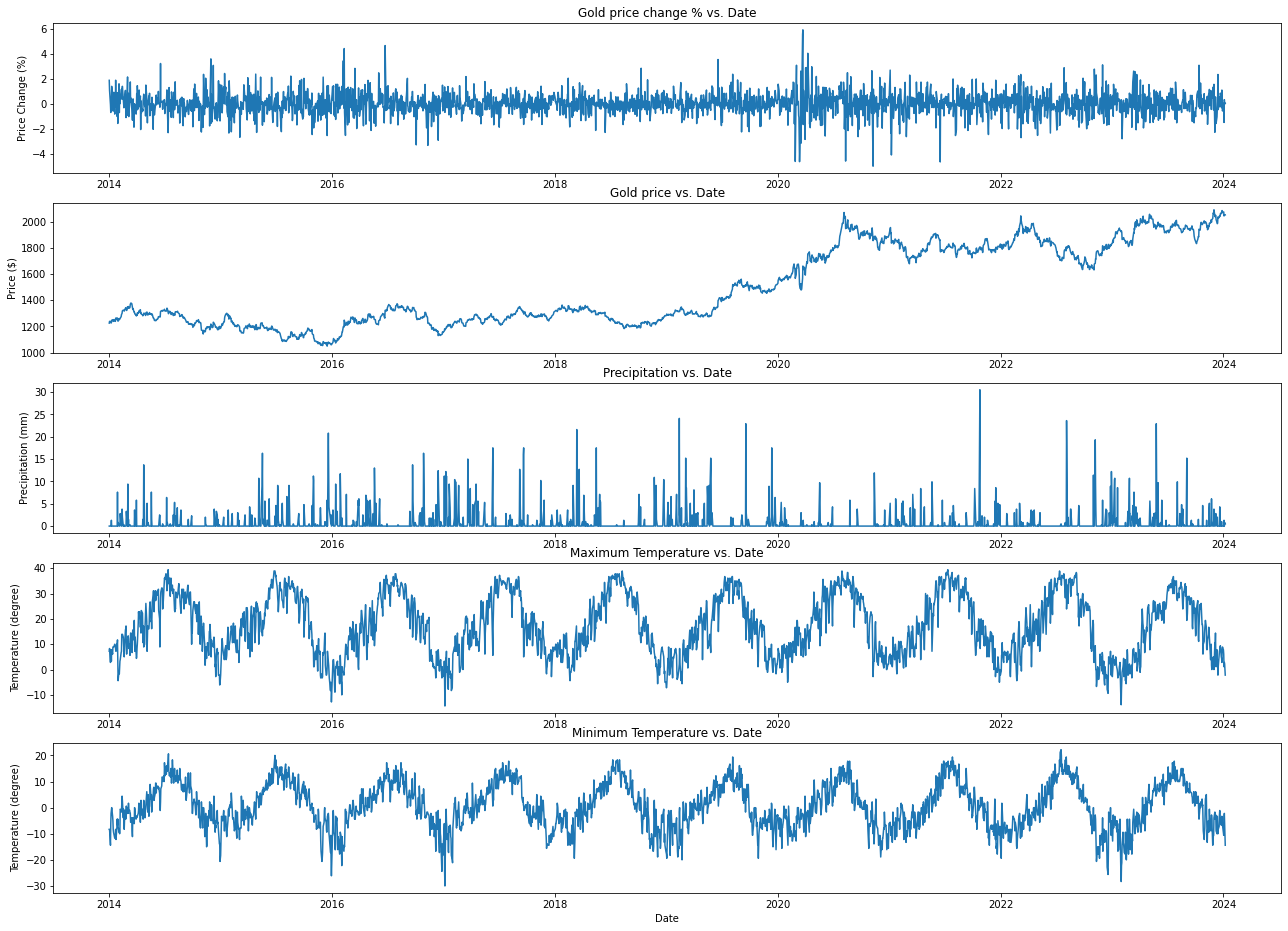

In [4]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(gold['Date'],gold['Change %'])
plt.title("Gold price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(gold['Date'],gold['Price'])
plt.title("Gold price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(gold['Date'],gold['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(gold['Date'],gold['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(gold['Date'],gold['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


## Silver price  with respect to Alaska Weather Index

In [5]:
df_silver = pd.read_csv("Silver Futures Historical Data.csv")
df_silver.sort_values(by = ['Date'], inplace = True)
df_silver.reset_index(drop = True, inplace = True)
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver = df_silver[['Date', 'Price', 'Change %']]
df_silver = df_silver.replace(',','', regex=True)
df_silver = df_silver.replace('%','', regex=True)
df_silver['Price']=df_silver['Price'].astype(float)
df_silver['Change %']=df_silver['Change %'].astype(float)
df_silver

,Date,Price,Change %
0,2014-01-02,20.128,3.91
1,2014-01-03,20.211,0.41
2,2014-01-06,20.103,-0.53
3,2014-01-07,19.787,-1.57
4,2014-01-08,19.539,-1.25
...,...,...,...
2574,2024-01-02,23.953,-0.40
2575,2024-01-03,23.157,-3.32
2576,2024-01-04,23.187,0.13
2577,2024-01-05,23.315,0.55


In [6]:
df_3574642 = pd.read_csv("3574642.csv")
df_3574642 = df_3574642[df_3574642.notnull().all(axis=1)]
df_3574642 = df_3574642.loc[df_3574642['STATION'] == 'USW00026411']

df_3574644 = pd.read_csv("3574644.csv")
df_3574644 = df_3574644[df_3574644.notnull().all(axis=1)]
df_3574644 = df_3574644.loc[df_3574644['STATION'] == 'USW00026411']

df_Alaska = pd.concat([df_3574642, df_3574644])
df_Alaska.reset_index(drop = True, inplace = True)
df_Alaska = df_Alaska[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Alaska['DATE'] = pd.to_datetime(df_Alaska['DATE'])

df_Alaska

,DATE,PRCP,TMAX,TMIN
0,2014-01-01,0.0,-7.1,-22.1
1,2014-01-02,0.3,-11.6,-23.8
2,2014-01-03,0.0,-8.8,-16.6
3,2014-01-04,0.8,-6.6,-21.0
4,2014-01-05,0.3,-4.3,-11.0
...,...,...,...,...
3661,2024-01-10,0.0,-15.5,-28.8
3662,2024-01-11,0.0,-18.2,-30.5
3663,2024-01-12,0.0,-21.0,-26.0
3664,2024-01-13,0.0,-18.8,-29.3


In [7]:
silver = df_silver.set_index("Date").join(df_Alaska.set_index('DATE'))
silver.reset_index(inplace = True, drop = False)
silver

,Date,Price,Change %,PRCP,TMAX,TMIN
0,2014-01-02,20.128,3.91,0.3,-11.6,-23.8
1,2014-01-03,20.211,0.41,0.0,-8.8,-16.6
2,2014-01-06,20.103,-0.53,0.0,-6.0,-16.0
3,2014-01-07,19.787,-1.57,0.0,-10.5,-20.5
4,2014-01-08,19.539,-1.25,0.0,-9.3,-14.3
...,...,...,...,...,...,...
2574,2024-01-02,23.953,-0.40,0.0,-21.0,-26.6
2575,2024-01-03,23.157,-3.32,0.0,-17.7,-27.1
2576,2024-01-04,23.187,0.13,0.0,-12.1,-17.7
2577,2024-01-05,23.315,0.55,0.0,-15.6,-26.1


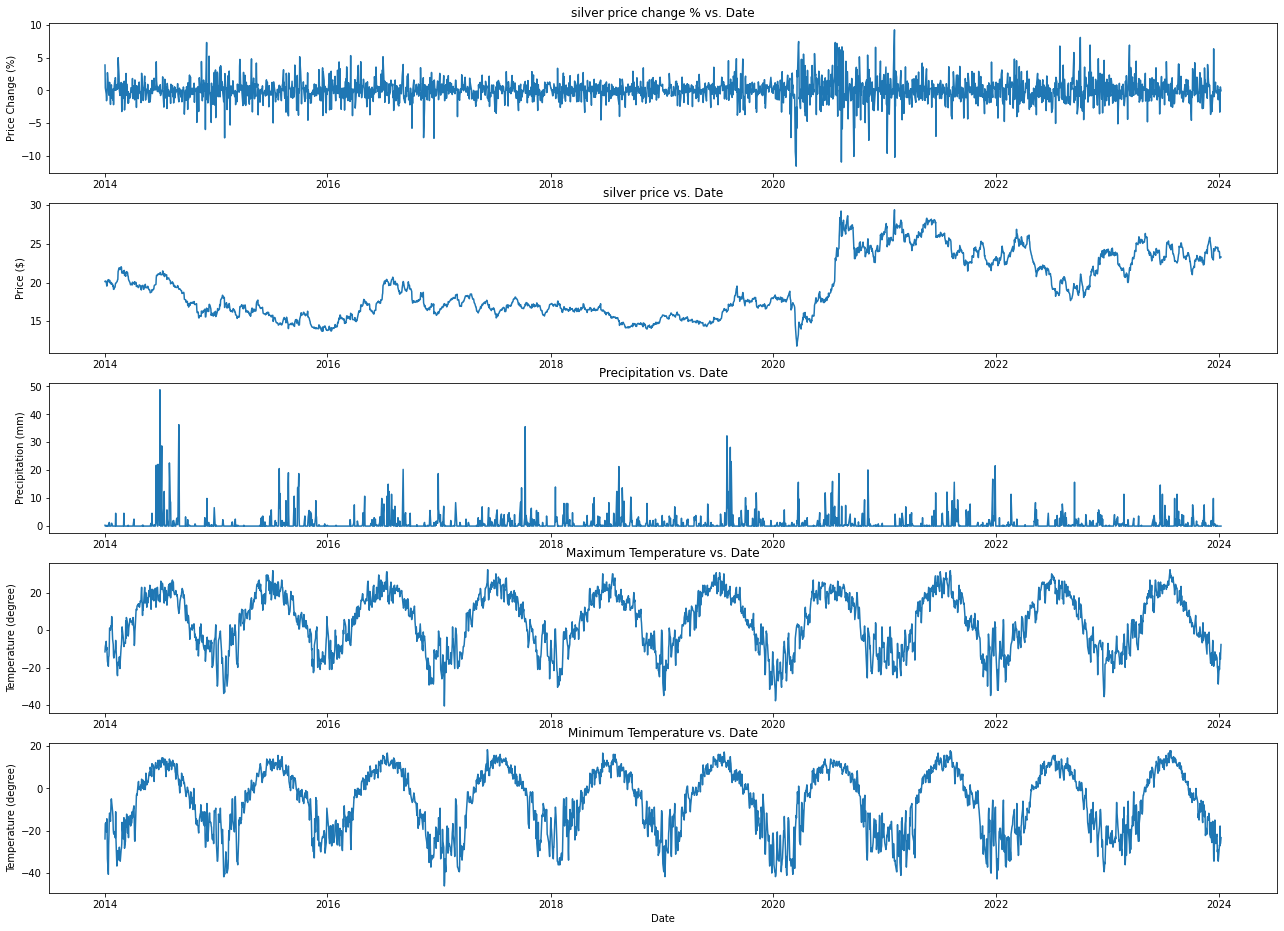

In [8]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(silver['Date'],silver['Change %'])
plt.title("silver price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(silver['Date'],silver['Price'])
plt.title("silver price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(silver['Date'],silver['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(silver['Date'],silver['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(silver['Date'],silver['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


## Coffee price with respect to Hawaii Weather Index

In [32]:
import pandas as pd
df_coffee = pd.read_csv("coffee-prices-historical-chart-data.csv", header =8)
df_coffee['date'] = pd.to_datetime(df_coffee['date'])
df_coffee =df_coffee.loc[(df_coffee['date'] >= '2014-01-01')]
df_coffee.reset_index(drop = True, inplace = True)
df_coffee['Change %'] = df_coffee[' value'].pct_change()*100
df_coffee = df_coffee[df_coffee.notnull().all(axis=1)]
df_coffee = df_coffee.rename(columns={' value':'Price', 'date': 'Date'})
df_coffee['Price']=df_coffee['Price'].astype(float)
df_coffee['Change %']=df_coffee['Change %'].astype(float)

df_coffee

,Date,Price,Change %
1,2014-01-03,1.1635,4.443447
2,2014-01-06,1.2100,3.996562
3,2014-01-07,1.1725,-3.099174
4,2014-01-08,1.2090,3.113006
5,2014-01-09,1.1935,-1.282051
...,...,...,...
2546,2024-01-01,1.9611,0.000000
2547,2024-01-02,1.8957,-3.334863
2548,2024-01-03,1.8527,-2.268291
2549,2024-01-04,1.8473,-0.291467


In [33]:
df_3574630 = pd.read_csv("3574630.csv")
df_3574630 = df_3574630[df_3574630.notnull().all(axis=1)]
df_3574630 = df_3574630.loc[df_3574630['STATION'] == 'USW00022516']

df_3574633 = pd.read_csv("3574633.csv")
df_3574633 = df_3574633[df_3574633.notnull().all(axis=1)]
df_3574633 = df_3574633.loc[df_3574633['STATION'] == 'USW00022516']

df_Hawaii = pd.concat([df_3574630, df_3574633])
df_Hawaii.reset_index(drop = True, inplace = True)
df_Hawaii = df_Hawaii[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Hawaii['DATE'] = pd.to_datetime(df_Hawaii['DATE'])

df_Hawaii

,DATE,PRCP,TMAX,TMIN
0,2014-01-01,0.0,27.8,17.2
1,2014-01-02,0.3,28.3,18.3
2,2014-01-03,24.1,27.2,20.6
3,2014-01-04,0.0,26.7,19.4
4,2014-01-05,0.0,26.1,17.2
...,...,...,...,...
3646,2024-01-10,1.0,27.2,20.6
3647,2024-01-11,1.8,26.1,18.9
3648,2024-01-12,0.8,25.0,16.1
3649,2024-01-13,0.3,25.0,16.1


In [34]:
coffee = df_coffee.set_index("Date").join(df_Hawaii.set_index('DATE'))
coffee.reset_index(inplace = True, drop = False)
coffee

,Date,Price,Change %,PRCP,TMAX,TMIN
0,2014-01-03,1.1635,4.443447,24.1,27.2,20.6
1,2014-01-06,1.2100,3.996562,0.0,26.1,17.8
2,2014-01-07,1.1725,-3.099174,1.0,26.7,18.3
3,2014-01-08,1.2090,3.113006,1.5,26.1,16.7
4,2014-01-09,1.1935,-1.282051,0.0,27.8,13.9
...,...,...,...,...,...,...
2545,2024-01-01,1.9611,0.000000,0.0,28.9,15.0
2546,2024-01-02,1.8957,-3.334863,0.0,28.9,19.4
2547,2024-01-03,1.8527,-2.268291,0.0,29.4,16.1
2548,2024-01-04,1.8473,-0.291467,0.0,30.0,17.2


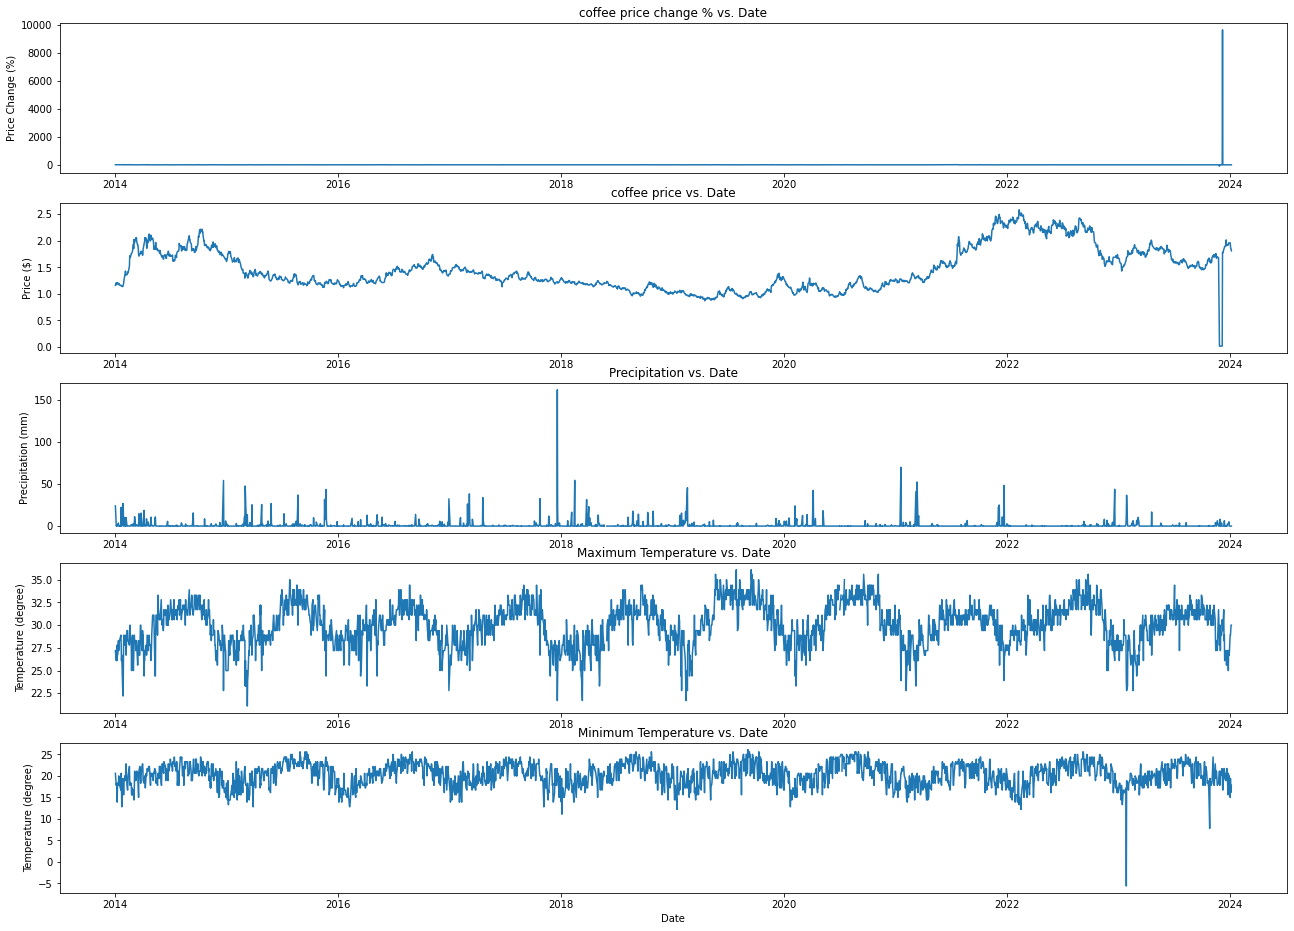

In [35]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(coffee['Date'],coffee['Change %'])
plt.title("coffee price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(coffee['Date'],coffee['Price'])
plt.title("coffee price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(coffee['Date'],coffee['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(coffee['Date'],coffee['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(coffee['Date'],coffee['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


## Cocoa price with respect to Hawaii Weather Index

In [10]:
import pandas as pd
df_cocoa = pd.read_csv("US Cocoa Futures Historical Data.csv")
df_cocoa.sort_values(by = ['Date'], inplace = True)
df_cocoa.reset_index(drop = True, inplace = True)
df_cocoa['Date'] = pd.to_datetime(df_cocoa['Date'])
df_cocoa = df_cocoa[['Date', 'Price', 'Change %']]
df_cocoa = df_cocoa.replace(',','', regex=True)
df_cocoa = df_cocoa.replace('%','', regex=True)
df_cocoa['Price']=df_cocoa['Price'].astype(float)
df_cocoa['Change %']=df_cocoa['Change %'].astype(float)
df_cocoa

,Date,Price,Change %
0,2014-01-01,2707.5,-0.06
1,2014-01-02,2636.0,-2.64
2,2014-01-03,2699.0,2.39
3,2014-01-06,2667.0,-1.19
4,2014-01-07,2675.0,0.30
...,...,...,...
2522,2023-12-29,4196.0,-1.41
2523,2024-01-02,4275.0,1.88
2524,2024-01-03,4238.0,-0.87
2525,2024-01-04,4260.0,0.52


In [19]:
df_3574630 = pd.read_csv("3574630.csv")
df_3574630 = df_3574630[df_3574630.notnull().all(axis=1)]
df_3574630 = df_3574630.loc[df_3574630['STATION'] == 'USW00022516']

df_3574633 = pd.read_csv("3574633.csv")
df_3574633 = df_3574633[df_3574633.notnull().all(axis=1)]
df_3574633 = df_3574633.loc[df_3574633['STATION'] == 'USW00022516']

df_Hawaii = pd.concat([df_3574630, df_3574633])
df_Hawaii.reset_index(drop = True, inplace = True)
df_Hawaii = df_Hawaii[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Hawaii['DATE'] = pd.to_datetime(df_Hawaii['DATE'])

df_Hawaii

,DATE,PRCP,TMAX,TMIN
0,2014-01-01,0.0,27.8,17.2
1,2014-01-02,0.3,28.3,18.3
2,2014-01-03,24.1,27.2,20.6
3,2014-01-04,0.0,26.7,19.4
4,2014-01-05,0.0,26.1,17.2
...,...,...,...,...
3646,2024-01-10,1.0,27.2,20.6
3647,2024-01-11,1.8,26.1,18.9
3648,2024-01-12,0.8,25.0,16.1
3649,2024-01-13,0.3,25.0,16.1


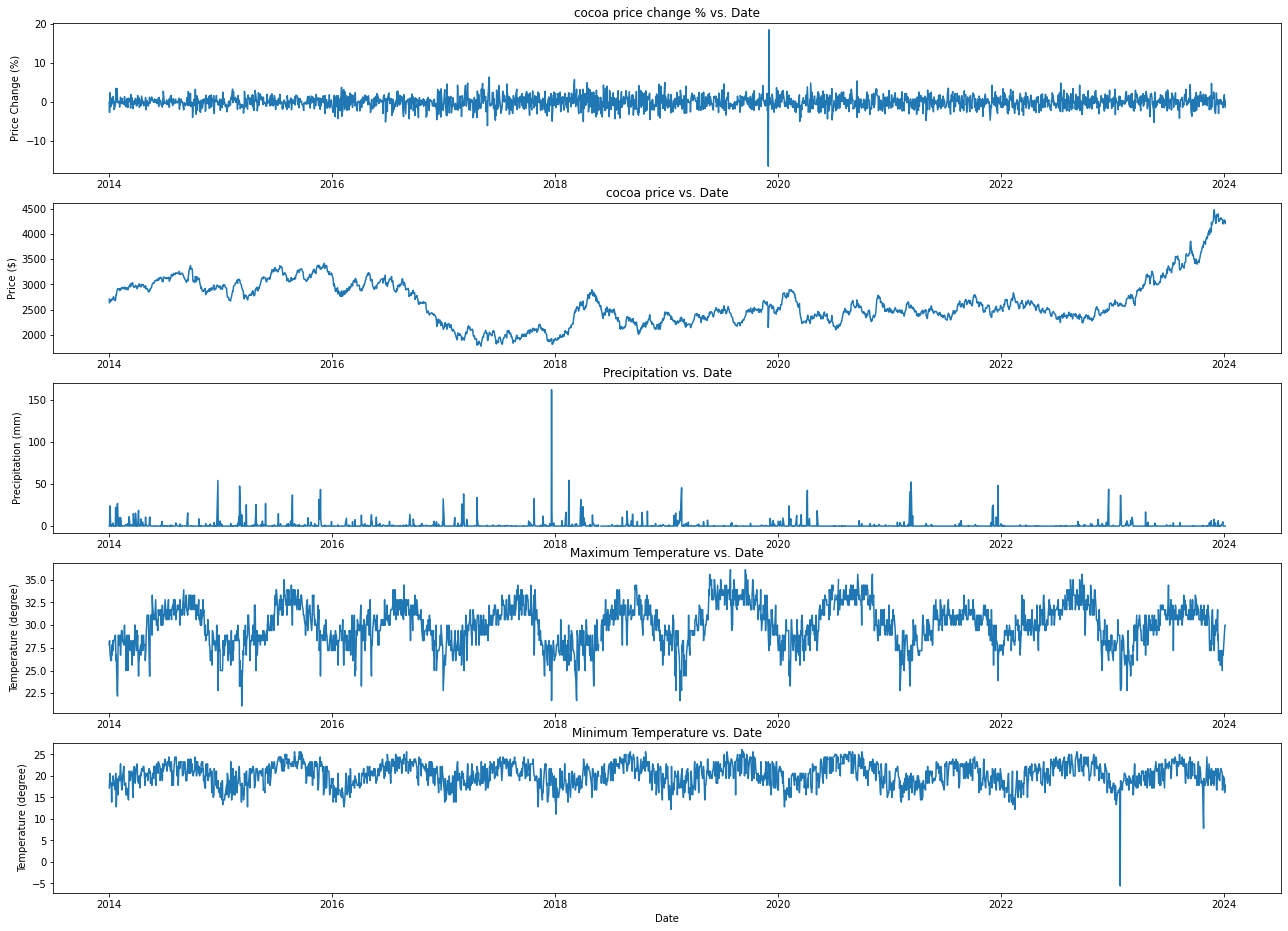

In [20]:
cocoa = df_cocoa.set_index("Date").join(df_Hawaii.set_index('DATE'))
cocoa.reset_index(inplace = True, drop = False)

plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(cocoa['Date'],cocoa['Change %'])
plt.title("cocoa price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(cocoa['Date'],cocoa['Price'])
plt.title("cocoa price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(cocoa['Date'],cocoa['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(cocoa['Date'],cocoa['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(cocoa['Date'],cocoa['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


In [ ]:
## Wheat price with respect to Kansas Weather Index

In [37]:
import pandas as pd
df_wheat = pd.read_csv("wheat-prices-historical-chart-data.csv", header = 8)
df_wheat['date'] = pd.to_datetime(df_wheat['date'])
df_wheat =df_wheat.loc[(df_wheat['date'] >= '2014-01-01')]
df_wheat.reset_index(drop = True, inplace = True)
df_wheat['Change %'] = df_wheat[' value'].pct_change()*100
df_wheat = df_wheat[df_wheat.notnull().all(axis=1)]
df_wheat = df_wheat.rename(columns={' value':'Price', 'date': 'Date'})
df_wheat['Price']=df_wheat['Price'].astype(float)
df_wheat['Change %']=df_wheat['Change %'].astype(float)

df_wheat

,Date,Price,Change %
1,2014-01-03,6.0575,1.465662
2,2014-01-06,6.0575,0.000000
3,2014-01-07,6.0250,-0.536525
4,2014-01-08,5.8875,-2.282158
5,2014-01-09,5.8425,-0.764331
...,...,...,...
2536,2024-01-01,6.6952,0.064266
2537,2024-01-02,6.5732,-1.822201
2538,2024-01-03,6.5178,-0.842816
2539,2024-01-04,6.5860,1.046365


In [38]:
df_3574610 = pd.read_csv("3574610.csv")
df_3574610 = df_3574610[df_3574610.notnull().all(axis=1)]
df_3574610 = df_3574610.loc[df_3574610['STATION'] == 'USW00013988']

df_3574614 = pd.read_csv("3574614.csv")
df_3574614 = df_3574614[df_3574614.notnull().all(axis=1)]
df_3574614 = df_3574614.loc[df_3574614['STATION'] == 'USW00013988']

df_Kansas = pd.concat([df_3574610, df_3574614])
df_Kansas.reset_index(drop = True, inplace = True)
df_Kansas = df_Kansas[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Kansas['DATE'] = pd.to_datetime(df_Kansas['DATE'])

df_Kansas

,DATE,PRCP,TMAX,TMIN
0,2014-01-01,0.8,5.0,-12.1
1,2014-01-02,0.0,-7.7,-16.0
2,2014-01-03,0.0,3.3,-14.9
3,2014-01-04,0.3,7.8,-8.2
4,2014-01-05,0.5,-8.2,-17.7
...,...,...,...,...
3624,2024-01-10,0.0,3.3,-8.8
3625,2024-01-11,0.0,1.7,-5.5
3626,2024-01-12,0.0,-0.5,-12.7
3627,2024-01-13,0.0,-12.7,-21.6


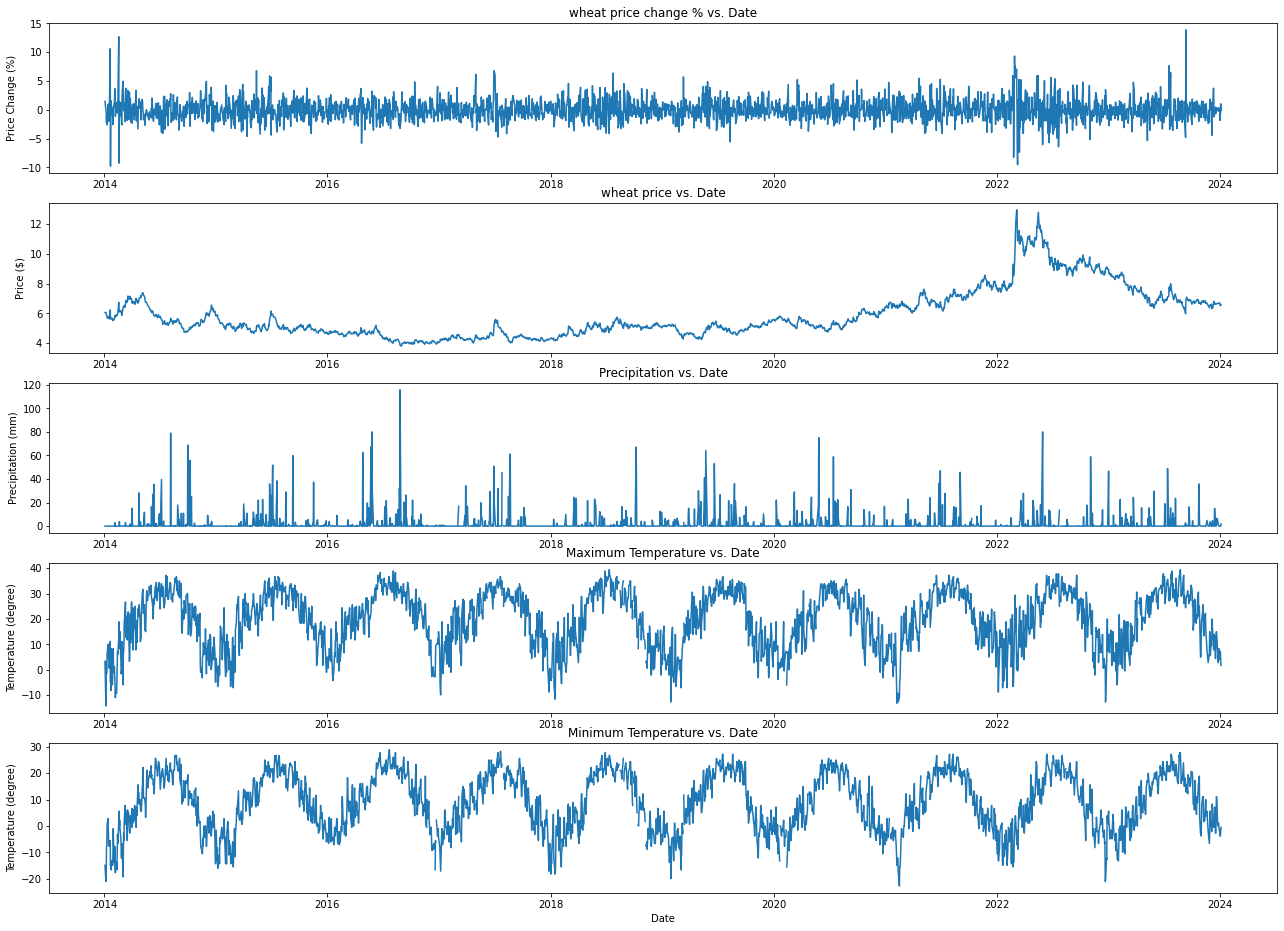

In [39]:
wheat = df_wheat.set_index("Date").join(df_Kansas.set_index('DATE'))
wheat.reset_index(inplace = True, drop = False)

plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(wheat['Date'],wheat['Change %'])
plt.title("wheat price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(wheat['Date'],wheat['Price'])
plt.title("wheat price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(wheat['Date'],wheat['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(wheat['Date'],wheat['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(wheat['Date'],wheat['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


In [ ]:
## Soybean price with respect to Illinois Weather Index

In [36]:

import pandas as pd
df_soy = pd.read_csv("soybean-prices-historical-chart-data.csv", header = 8)
df_soy['date'] = pd.to_datetime(df_soy['date'])
df_soy =df_soy.loc[(df_soy['date'] >= '2014-01-01')]
df_soy.reset_index(drop = True, inplace = True)
df_soy['Change %'] = df_soy[' value'].pct_change()*100
df_soy = df_soy[df_soy.notnull().all(axis=1)]
df_soy = df_soy.rename(columns={' value':'Price', 'date': 'Date'})
df_soy['Price']=df_soy['Price'].astype(float)
df_soy['Change %']=df_soy['Change %'].astype(float)
df_soy

,Date,Price,Change %
1,2014-01-03,12.7125,0.098425
2,2014-01-06,12.7675,0.432645
3,2014-01-07,12.7600,-0.058743
4,2014-01-08,12.6925,-0.528997
5,2014-01-09,12.7375,0.354540
...,...,...,...
2534,2024-01-01,12.9200,0.000000
2535,2024-01-02,12.7400,-1.393189
2536,2024-01-03,12.6900,-0.392465
2537,2024-01-04,12.6400,-0.394011


In [40]:
df_3574621 = pd.read_csv("3574621.csv")
df_3574621 = df_3574621[df_3574621.notnull().all(axis=1)]
df_3574621 = df_3574621.loc[df_3574621['STATION'] == 'USC00110338']

df_3574623 = pd.read_csv("3574623.csv")
df_3574623 = df_3574623[df_3574623.notnull().all(axis=1)]
df_3574623 = df_3574623.loc[df_3574623['STATION'] == 'USC00110338']

df_Illinois = pd.concat([df_3574621, df_3574623])
df_Illinois.reset_index(drop = True, inplace = True)
df_Illinois = df_Illinois[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Illinois['DATE'] = pd.to_datetime(df_Illinois['DATE'])
df_Illinois

,DATE,PRCP,TMAX,TMIN
0,2014-01-01,2.5,-9.4,-17.2
1,2014-01-02,7.4,-6.1,-10.0
2,2014-01-03,0.0,-8.9,-21.1
3,2014-01-04,0.0,-5.0,-21.1
4,2014-01-05,9.4,-0.6,-8.3
...,...,...,...,...
3645,2024-01-10,16.3,2.8,-1.1
3646,2024-01-11,0.0,1.1,-1.7
3647,2024-01-12,7.6,0.0,-3.9
3648,2024-01-13,10.2,1.7,-4.4


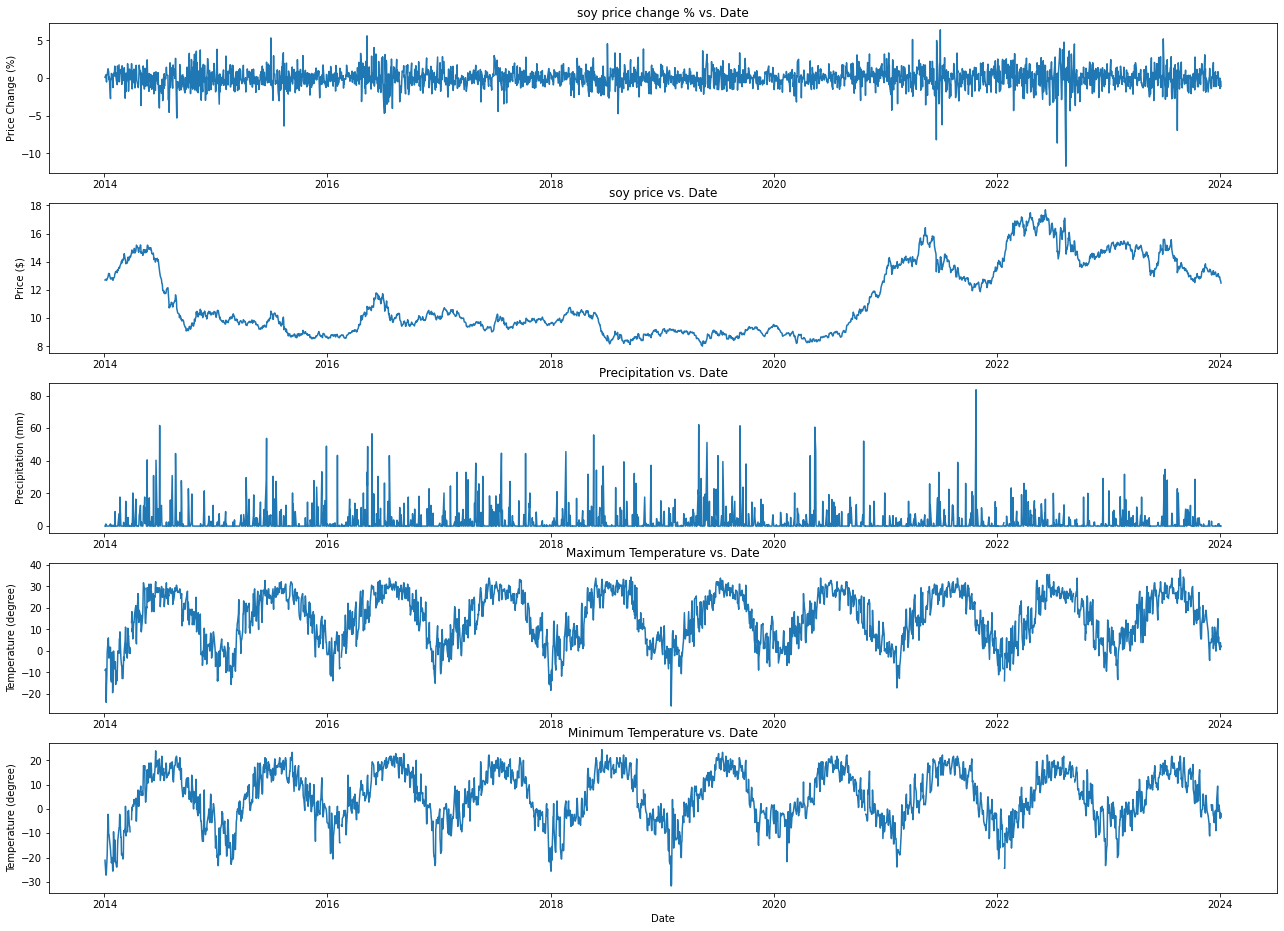

In [41]:
soy = df_soy.set_index("Date").join(df_Illinois.set_index('DATE'))
soy.reset_index(inplace = True, drop = False)

plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(soy['Date'],soy['Change %'])
plt.title("soy price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(soy['Date'],soy['Price'])
plt.title("soy price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(soy['Date'],soy['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(soy['Date'],soy['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(soy['Date'],soy['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()
